In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('E:\\Dataset\\IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
df.shape

(49582, 2)

In [10]:
df=df.iloc[:15000]

<Axes: xlabel='sentiment', ylabel='count'>

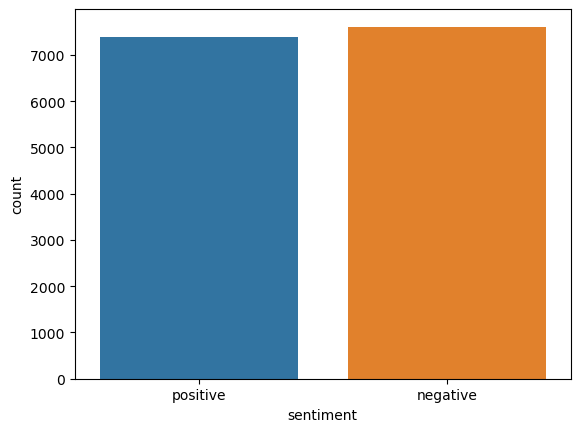

In [5]:
import seaborn as sns
sns.countplot(data=df,x='sentiment')

In [11]:
df['sentiment'].value_counts()

negative    7597
positive    7403
Name: sentiment, dtype: int64

In [12]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(15000, 2)

In [16]:
df['review']=df['review'].str.lower()

In [17]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [18]:
import re
def url(text):
    if re.search('https?://\+|www.\.\$+',text):
        return True


In [19]:
df['review'].apply(url).sum()
#so no url tags 

0

In [20]:
def tags(text):
    clean=re.sub('<.*?>','',text)
    return clean

In [21]:
df['review']=df['review'].apply(tags)

In [22]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [23]:
import string
exclude=string.punctuation
def punc(text):
    return text.translate(str.maketrans('','',exclude))

In [24]:
df['review']=df['review'].apply(punc)

In [25]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [26]:
import nltk

In [27]:
from nltk.corpus import stopwords

In [28]:
s=stopwords.words('english')
print(s)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
def remove_stopwords(text):
    new_text=[]
    for w in text.split():
        if w in s:
            new_text.append('')
        else:
            new_text.append(w)
    return ' '.join(new_text)

In [30]:
df['review']=df['review'].apply(remove_stopwords)

In [31]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz e...,positive
1,wonderful little production filming techniqu...,positive
2,thought wonderful way spend time hot s...,positive
3,basically theres family little boy jake thi...,negative
4,petter matteis love time money visually s...,positive


In [32]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stem_words(text):
    return ' '.join([ps.stem(word) for word in text.split()])

In [33]:
df['review']=df['review'].apply(stem_words)

In [34]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In [35]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
y=e.fit_transform(df['sentiment'])

In [36]:
y[0:5]

array([1, 1, 1, 0, 1])

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['review'],y,test_size=0.2,random_state=1)

In [38]:
X_train.shape

(12000,)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer()
X_train_bow = tfidf.fit_transform(X_train).toarray()
X_test_bow = tfidf.transform(X_test).toarray()

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [35]:
gnb.fit(X_train_bow,y_train)

GaussianNB()

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=gnb.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.6247911794186435

In [40]:
confusion_matrix(y_test,y_pred)

array([[ 813,  690],
       [ 433, 1057]], dtype=int64)

In [41]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.65      0.54      0.59      1503\n           1       0.61      0.71      0.65      1490\n\n    accuracy                           0.62      2993\n   macro avg       0.63      0.63      0.62      2993\nweighted avg       0.63      0.62      0.62      2993\n'

In [42]:
tfidf=TfidfVectorizer()
X_train_bow = tfidf.fit_transform(X_train).toarray()
X_test_bow = tfidf.transform(X_test).toarray()
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_bow,y_train)

RandomForestClassifier()

In [43]:
y_pred=rfc.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8429669228199131

In [44]:
confusion_matrix(y_test,y_pred)

array([[1292,  211],
       [ 259, 1231]], dtype=int64)

In [45]:
import pickle
filename='imdb_sentiment.sav'
pickle.dump(rfc,open(filename,'wb'))

In [46]:
load_model=pickle.load(open('imdb_sentiment.sav','rb'))


In [47]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))


In [88]:
text='Loved this movie. Joshua Caldwell actually takes the time for the audience to get to know and understand the characters so you care about them once things get tense. Most Hollywood movies could take note. The action is well done, performances are spot on and I love the little details throughout the movie that add suspense and character. Most films like this would jump straight to the next location. Instead we get to see how things develop for the characters. Very well done, beautifully shot and excellent editing as well.'
text=remove_punc(text)
print(text)

Loved this movie Joshua Caldwell actually takes the time for the audience to get to know and understand the characters so you care about them once things get tense Most Hollywood movies could take note The action is well done performances are spot on and I love the little details throughout the movie that add suspense and character Most films like this would jump straight to the next location Instead we get to see how things develop for the characters Very well done beautifully shot and excellent editing as well


In [89]:
text=remove_stopwords(text)
print(text)

Loved  movie Joshua Caldwell actually takes  time   audience  get  know  understand  characters   care    things get tense Most Hollywood movies could take note The action  well done performances  spot   I love  little details throughout  movie  add suspense  character Most films like  would jump straight   next location Instead  get  see  things develop   characters Very well done beautifully shot  excellent editing  well


In [90]:
text=stem_words(text)
print(text)

love movi joshua caldwel actual take time audienc get know understand charact care thing get tens most hollywood movi could take note the action well done perform spot i love littl detail throughout movi add suspens charact most film like would jump straight next locat instead get see thing develop charact veri well done beauti shot excel edit well


In [91]:
input=tfidf.transform([text]).toarray()


In [92]:
load_model.predict(input)

array([1])

In [93]:
pickle.dump(tfidf,open('tfidf_imdb_sentiment.pkl','wb'))